## 빵형의 개발도상국 : 음악 장르 분류 인공지능과 음악 추천 알고리즘 만들기

코드 :
https://colab.research.google.com/drive/1pC4pJHAIA8e0zdD02kFXu7fngrMguOnx?usp=sharing#scrollTo=ZEXl1ORpN83s

원본 영상 :
https://www.youtube.com/watch?v=IE6lue0qusQ


# 학습 : 음악 장르 분류하기

In [1]:
import pandas as pd

df = pd.read_csv('/content/features_3_sec.csv')

df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


# 전처리

In [4]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

x = df.drop(columns=['filename', 'length','label'])
y = df['label'] # 장르를 구분할 결과 값

scaler = MinMaxScaler()
np_scaled = scaler.fit_transform(x)

x = pd.DataFrame(np_scaled, columns=x.columns)

x.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,0.204458,0.008479,0.627798,0.065750,0.558889,0.094009,0.398969,0.705797,0.053666,0.520907,0.049058,0.436564,0.087325,0.612386,0.077451,0.442464,0.092440,0.615847,0.079919,0.401687,0.049143,0.548711,0.143782,0.346570,0.182065,0.471486,0.188510,0.349726,0.089786,0.453269,0.074706,0.376489,0.046738,0.547239,0.050357,0.399156,0.066637,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,0.220384,0.015719,0.627315,0.038963,0.556635,0.082431,0.375552,0.696756,0.044735,0.510794,0.040432,0.451290,0.055461,0.682923,0.060499,0.385907,0.083584,0.630069,0.082378,0.402853,0.135101,0.563791,0.094805,0.376837,0.145341,0.554920,0.102538,0.326362,0.071884,0.426042,0.066947,0.330153,0.040780,0.546890,0.050933,0.380825,0.108298,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,0.173133,0.006448,0.628102,0.098196,0.567421,0.073998,0.375552,0.687860,0.083848,0.482928,0.048348,0.483199,0.045925,0.683410,0.061136,0.498369,0.076570,0.666625,0.069380,0.436689,0.122999,0.527851,0.089802,0.366354,0.271352,0.472968,0.059395,0.369542,0.062476,0.475571,0.059796,0.376549,0.058360,0.515473,0.030699,0.481771,0.078810,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,0.167277,0.004587,0.629326,0.065471,0.564424,0.100660,0.375552,0.706313,0.055188,0.547621,0.063054,0.461877,0.025883,0.599954,0.078755,0.365562,0.086912,0.619799,0.133131,0.422114,0.092336,0.557104,0.126007,0.358830,0.158894,0.501274,0.071605,0.315785,0.077950,0.456012,0.064220,0.381356,0.093799,0.559949,0.041571,0.353526,0.069696,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,0.169278,0.004355,0.630608,0.075828,0.556466,0.099061,0.375552,0.722236,0.046525,0.557220,0.040977,0.455376,0.040963,0.603178,0.043292,0.354883,0.059964,0.600390,0.083799,0.407559,0.061604,0.561470,0.086810,0.295722,0.210794,0.515745,0.108017,0.394926,0.072840,0.544897,0.071432,0.361231,0.068626,0.500581,0.024291,0.386226,0.061869,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


# 데이터 셋 분할
training set과 test set으로 나눈다.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=2021)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1998, 57) (7992, 57)
(1998,) (7992,)


# 학습 및 검증


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(x_train, y_train)

y_preds = xgb.predict(x_test)

print("Accuracy : %.2f" % accuracy_score(y_test, y_preds) )

Accuracy : 0.79


# Confusion Matrix

- 가로 : 우리가 예측한 값
- 세로 : 실제 정답
- 가운데 대각선 : 예측한 값과 실제 정답이 일치한다.

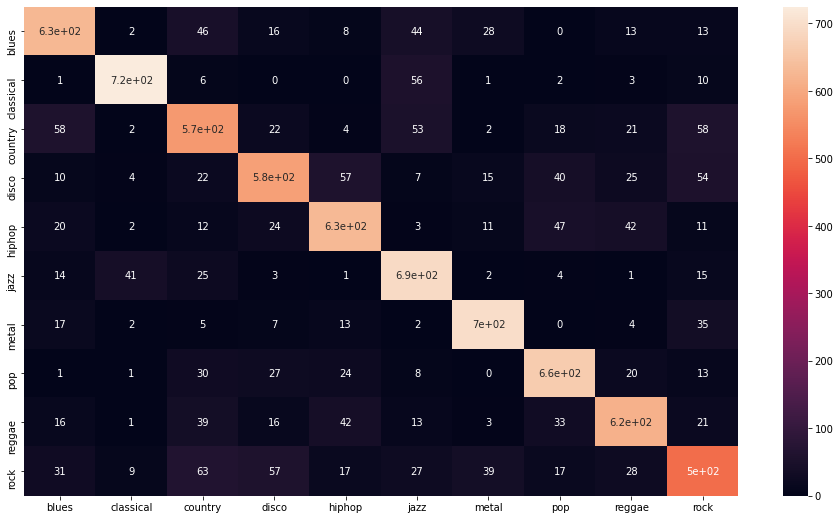

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(16,9))
sns.heatmap(
    cm,
    annot=True,
    xticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
    yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
)
plt.show()

In [14]:
# 어떤 feature가 중요한지를 알려준다.
for feature, importance in zip(x_test.columns, xgb.feature_importances_) :
    print("%s: %.2f" % (feature, importance))

    # perceptr_var: 0.08 가 가장 중요하다.

chroma_stft_mean: 0.04
chroma_stft_var: 0.02
rms_mean: 0.01
rms_var: 0.03
spectral_centroid_mean: 0.01
spectral_centroid_var: 0.01
spectral_bandwidth_mean: 0.07
spectral_bandwidth_var: 0.01
rolloff_mean: 0.02
rolloff_var: 0.02
zero_crossing_rate_mean: 0.02
zero_crossing_rate_var: 0.01
harmony_mean: 0.02
harmony_var: 0.02
perceptr_mean: 0.02
perceptr_var: 0.08
tempo: 0.02
mfcc1_mean: 0.02
mfcc1_var: 0.03
mfcc2_mean: 0.02
mfcc2_var: 0.01
mfcc3_mean: 0.01
mfcc3_var: 0.02
mfcc4_mean: 0.03
mfcc4_var: 0.01
mfcc5_mean: 0.01
mfcc5_var: 0.02
mfcc6_mean: 0.02
mfcc6_var: 0.01
mfcc7_mean: 0.01
mfcc7_var: 0.02
mfcc8_mean: 0.01
mfcc8_var: 0.02
mfcc9_mean: 0.02
mfcc9_var: 0.01
mfcc10_mean: 0.01
mfcc10_var: 0.02
mfcc11_mean: 0.01
mfcc11_var: 0.01
mfcc12_mean: 0.03
mfcc12_var: 0.01
mfcc13_mean: 0.02
mfcc13_var: 0.01
mfcc14_mean: 0.01
mfcc14_var: 0.01
mfcc15_mean: 0.01
mfcc15_var: 0.01
mfcc16_mean: 0.01
mfcc16_var: 0.01
mfcc17_mean: 0.01
mfcc17_var: 0.01
mfcc18_mean: 0.01
mfcc18_var: 0.01
mfcc19_mean: 0

# 간단한 음악 추천 시스템
cosin similarity를 주로 사용함

In [17]:
df_3 = pd.read_csv('/content/features_3_sec.csv', index_col='filename')

labels = df_3[['label']]
df_3 = df_3.drop(columns=['length','label'])

df_3_scaled = sklearn.preprocessing.scale(df_3) # 전처리

df_3 = pd.DataFrame(df_3_scaled, columns=df_3.columns)

df_3.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-0.487808,0.640520,-0.006624,0.235568,-0.566828,-0.572791,-0.493983,-0.009229,-0.518590,-0.367952,-0.454064,-0.570777,0.168385,-0.335954,0.295495,-0.009975,0.131009,0.251728,-0.141988,0.694964,-0.713185,-0.561033,-0.034151,0.229042,-0.016645,-0.292379,0.083698,0.373044,-0.423366,-0.921920,-0.889288,0.637318,0.207617,-0.754018,0.204064,0.224729,0.673577,-0.409692,0.071046,0.693864,-0.338503,0.070763,-0.642357,1.027750,-0.153788,-0.515791,-0.265968,-0.750122,-0.299108,0.168647,-0.425137,-0.003423,-0.376938,-0.499464,-0.513562,0.128414,-0.291781
1,-0.403142,0.131835,-0.264944,-0.342134,-0.508798,-0.749862,-0.425382,-0.519010,-0.424118,-0.642268,-0.337473,-0.440170,0.156342,-0.605355,0.263734,-0.112440,-0.055935,0.186320,-0.296811,0.618174,-0.809301,-0.447326,-0.482782,0.723712,-0.309489,-0.687218,-0.041866,0.473445,-0.394832,-0.914289,-0.017413,0.781073,-0.367204,-0.522643,-0.134981,1.087476,-0.300554,-0.668525,-0.234700,0.424272,-0.456989,-0.354962,-0.736384,1.024415,-0.140138,-0.695751,0.427020,0.457983,0.428544,-0.327031,-0.310040,-0.112125,-0.032083,-0.066593,1.011384,1.275780,0.056425
2,-0.361694,0.764491,0.016695,0.542195,-0.546245,-0.701852,-0.288365,-0.425734,-0.346190,-0.562723,-0.683379,-0.607419,0.175942,-0.009629,0.415753,-0.187073,-0.055935,0.121959,0.381194,0.406587,-0.721094,-0.200934,-0.617035,0.727133,-0.298483,0.097898,-0.141313,0.731507,-0.545653,-0.692909,-0.140170,0.438458,-0.425926,-0.602780,1.028363,0.240055,-0.789404,-0.190173,-0.395388,0.914693,-0.566195,0.071315,-0.458957,0.724276,-0.620000,0.295239,-0.063484,0.585548,0.503695,0.428053,-0.648762,0.316311,-0.177372,0.109337,-0.046244,0.653907,-0.521458
3,-0.175714,0.205477,0.024885,-0.063820,-0.723482,-0.700599,-0.517344,-0.348881,-0.607665,-0.474804,-0.726248,-0.640986,0.206475,-0.338752,0.373503,0.048886,-0.055935,0.255456,-0.115604,0.897807,-0.557221,-0.365575,-0.899218,0.141858,0.005873,-0.829252,0.005313,0.400944,0.194107,-0.788267,-0.451187,0.717328,-0.001006,-0.660298,-0.009853,0.532748,-0.651053,-0.785692,-0.131096,0.721028,-0.498634,0.115475,0.100277,1.149176,-0.362144,-0.963740,-0.215086,-0.489524,-0.065309,0.062981,-0.649076,0.092384,-0.464121,-0.211882,-0.099501,0.865880,-0.544744
4,-0.485895,0.337521,0.181345,-0.272072,-0.756246,-0.774827,-0.538557,-0.572962,-0.667537,-0.683920,-0.711602,-0.645175,0.238425,-0.234588,0.261354,0.034742,-0.055935,0.370652,-0.265774,0.970695,-0.803235,-0.415777,-0.686890,0.164463,-0.606729,-0.903804,-0.376751,0.263928,-0.378335,-0.883498,-0.762892,0.758943,-0.461040,-1.142710,0.469290,0.682383,-0.238469,0.091036,-0.218380,1.601141,-0.388495,-0.069426,-0.296970,0.582003,-0.771951,-0.642723,-0.345270,0.112417,-0.570609,0.856651,-0.167089,0.183265,-0.029476,-0.175130,-0.678995,0.276899,-0.606692


# Cosine Similarity

각 각의 음악 장르 간의 '코사인 각도'에 따라 유사도를 구한다.
- cos0 = 1 : 완전 일치
- cos180 = -1 : 완전 불일치

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(df_3)

sim_df = pd.DataFrame(similarity, index=labels.index, columns=labels.index)

print(sim_df.shape) # (9990, 9990) >> 9990곡 간의 similarity를 계산해준다.
sim_df.head()

# 같은 음악일 때는 cos = 1이 나온다.

(9990, 9990)


filename,blues.00000.0.wav,blues.00000.1.wav,blues.00000.2.wav,blues.00000.3.wav,blues.00000.4.wav,blues.00000.5.wav,blues.00000.6.wav,blues.00000.7.wav,blues.00000.8.wav,blues.00000.9.wav,blues.00001.0.wav,blues.00001.1.wav,blues.00001.2.wav,blues.00001.3.wav,blues.00001.4.wav,blues.00001.5.wav,blues.00001.6.wav,blues.00001.7.wav,blues.00001.8.wav,blues.00001.9.wav,blues.00002.0.wav,blues.00002.1.wav,blues.00002.2.wav,blues.00002.3.wav,blues.00002.4.wav,blues.00002.5.wav,blues.00002.6.wav,blues.00002.7.wav,blues.00002.8.wav,blues.00002.9.wav,blues.00003.0.wav,blues.00003.1.wav,blues.00003.2.wav,blues.00003.3.wav,blues.00003.4.wav,blues.00003.5.wav,blues.00003.6.wav,blues.00003.7.wav,blues.00003.8.wav,blues.00003.9.wav,...,rock.00096.0.wav,rock.00096.1.wav,rock.00096.2.wav,rock.00096.3.wav,rock.00096.4.wav,rock.00096.5.wav,rock.00096.6.wav,rock.00096.7.wav,rock.00096.8.wav,rock.00096.9.wav,rock.00097.0.wav,rock.00097.1.wav,rock.00097.2.wav,rock.00097.3.wav,rock.00097.4.wav,rock.00097.5.wav,rock.00097.6.wav,rock.00097.7.wav,rock.00097.8.wav,rock.00097.9.wav,rock.00098.0.wav,rock.00098.1.wav,rock.00098.2.wav,rock.00098.3.wav,rock.00098.4.wav,rock.00098.5.wav,rock.00098.6.wav,rock.00098.7.wav,rock.00098.8.wav,rock.00098.9.wav,rock.00099.0.wav,rock.00099.1.wav,rock.00099.2.wav,rock.00099.3.wav,rock.00099.4.wav,rock.00099.5.wav,rock.00099.6.wav,rock.00099.7.wav,rock.00099.8.wav,rock.00099.9.wav
filename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
blues.00000.0.wav,1.000000,0.566223,0.574240,0.762002,0.761645,0.650941,0.695498,0.766532,0.760135,0.627689,0.029179,0.356657,0.228621,0.134698,0.193194,0.420584,0.385598,0.300613,0.406929,0.257583,0.220178,0.475425,0.494420,0.425269,0.507687,0.279673,0.425702,0.564154,0.503154,0.514924,0.236185,0.226434,0.271340,0.078960,0.117525,0.198494,0.224122,0.234144,0.206774,0.208514,...,0.475103,0.379484,0.221492,0.448927,0.502797,0.499155,0.511351,0.479123,0.465248,0.459760,0.461074,0.458359,0.337261,0.396915,0.366111,0.372897,0.385271,0.390702,0.390136,0.434481,0.450432,0.321015,0.416238,0.401557,0.459348,0.486477,0.457581,0.089020,0.127239,0.405952,0.221833,0.154208,-0.013789,0.372188,0.456640,0.387531,0.382302,0.048050,0.457812,0.353021
blues.00000.1.wav,0.566223,1.000000,0.639639,0.749346,0.615946,0.605654,0.692011,0.641135,0.786465,0.765471,-0.042021,0.195820,0.270651,-0.060973,0.164163,0.261802,0.294667,0.217317,0.406267,0.102275,0.052587,0.532206,0.510808,0.507970,0.408629,0.163295,0.322752,0.581902,0.528559,0.491143,0.018535,0.048064,-0.011625,0.040943,-0.049801,-0.058415,0.131961,0.082574,-0.110572,0.007333,...,0.482010,0.454998,0.176106,0.560503,0.556602,0.619291,0.599624,0.556036,0.508763,0.571896,0.521243,0.482577,0.418680,0.486683,0.408568,0.345879,0.488160,0.523123,0.527249,0.485132,0.357323,0.383613,0.396509,0.357476,0.399896,0.496708,0.523929,-0.009546,-0.133419,0.340331,0.412396,0.519078,-0.069361,0.570347,0.617002,0.634812,0.509724,-0.040774,0.553467,0.329800
blues.00000.2.wav,0.574240,0.639639,1.000000,0.659545,0.715466,0.595426,0.750551,0.733546,0.525333,0.580205,0.325279,0.222181,0.100603,0.159175,0.292442,0.313381,0.365387,0.214918,0.347671,0.186330,-0.054465,0.446321,0.403254,0.454921,0.313606,0.029562,0.198918,0.432259,0.430905,0.493822,0.417085,0.355082,0.256300,0.252721,0.184098,0.196385,0.329571,0.296491,0.038238,0.226387,...,0.398452,0.348213,0.360544,0.392806,0.365721,0.448940,0.448030,0.419623,0.397966,0.376433,0.355855,0.313160,0.209545,0.263781,0.149457,0.123349,0.253069,0.253143,0.242766,0.249936,0.460999,0.395396,0.299968,0.280298,0.299562,0.437184,0.470524,0.161387,-0.021791,0.433579,0.290419,0.320014,0.056435,0.469341,0.306737,0.432974,0.198399,0.037191,0.530360,0.192676
blues.00000.3.wav,0.762002,0.749346,0.659545,1.000000,0.796544,0.787118,0.772266,0.810613,0.729950,0.617242,0.039695,0.251716,0.182432,0.028448,0.225284,0.371550,0.400583,0.276211,0.484143,0.247944,0.174397,0.604934,0.606241,0.607260,0.551413,0.273403,0.4579

In [23]:
# 가장 유사한 음악을 찾아주는 함수

def find_similar_songs(name, n=5):
  series = sim_df[name].sort_values(ascending=False)
  series = series.drop(name)

  return series.head(n).to_frame()

find_similar_songs('/content/jazz.00000.wav')


KeyError: ignored